# Análisis&nbsp;exploratorio&nbsp;de&nbsp;Datos&nbsp;-&nbsp;Regresión&nbsp;Lineal&nbsp;Simple

En esta ocación partiremos por analizar los datos del siguiente Dataset https://www.kaggle.com/lepchenkov/usedcarscatalog donde encontraremos un catalogo de ventas de autos usados, una vez analisado pasaremos a implementar el procesamiento de datos para luego crear un modelo de regresion lineal simple

Empezamos importando las librerias necesarias para este analisis,
y cargando el dataset con pandas


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cars.csv')  #Cargamos y guardamos el dataset
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


Exploramos los datos que tenemos en el data set 

In [ ]:
df.info() # info nos muestra información acerca de los tipos de datos que poseemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

Vemos que nuestro DataSet contiene varias columnas (Feature) que no vamos a usar, asi que pasamos a eliminar dichas columnas

In [ ]:
features=['feature_0',
'feature_1',
'feature_2',
'feature_3',
'feature_4',      # Creamos una Lista donde incluimos todas las columnas que deseamos eliminar
'feature_5',
'feature_6',
'feature_7',
'feature_8',
'feature_9',
]
def remove_Columnus(df): # Creamos la funcion para eliminar dichas columnas

    for i in range(len(features)):
       
       D = df.drop(features[i],1)  #  iteramos en la lista para seleccionar las columnas a borrar
       df =  D
    return df


In [ ]:
NewDF = remove_Columnus(df) # Procedemos a borrar
NewDF.head() # La funcion Head nos ayuda a ver las primeras 5 filas del dataset

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


Luego que eliminamos los datos que no usaremos, es hora de buscar la correlacion entre los datos, en este caso usaremos un Heatmap.

<AxesSubplot:>

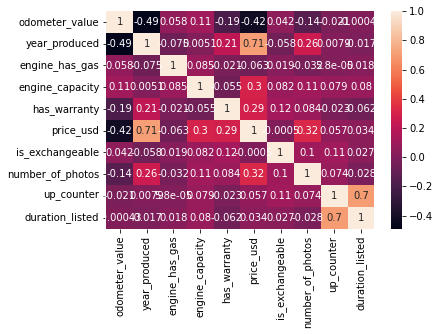

In [ ]:
sns.heatmap(NewDF.corr(), annot=True) # Usaremos la funcion Corr() para encontrar la correlacion entre los datos

El Heatmap nos ayuda a identificar los datos que tiene mayor correlacion de una forma visual, aquellos que tienen color mas oscuro son los que poseen menos valor de correlacion, y aquellos que tiene colores mas claros son los de mayor correlacion.

Ahora pasamos a elegir los datos de year_produced y price_usd, vemos que entre ellos hay un valor alto de correlacion, por lo tanto podemos escogerlos para estudiarlos e intentar alimentar un modelo de regresion lineal

<AxesSubplot:xlabel='year_produced', ylabel='price_usd'>

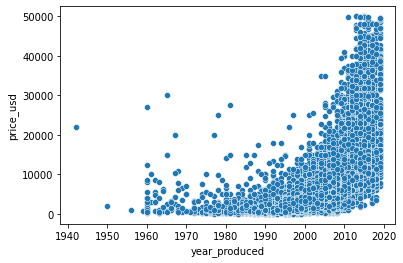

In [ ]:
sns.scatterplot(data=df, x = 'year_produced', y = 'price_usd') # Scatterplot podemos ver la distribucion de los datos

Vemos que la distribucion de el año del auto y el precio se agrupan hacia la derecha, si nuestro objetivo es alimentar un modelo de regresion lineal, debemos procurar que los datos se agrupen lo mas cerca a una distribucion lineal.

Pasamos a ver las medidas de dispersion, donde encontraremos los cuartiles, los maximos, minimos y los outliers

<AxesSubplot:xlabel='price_usd'>

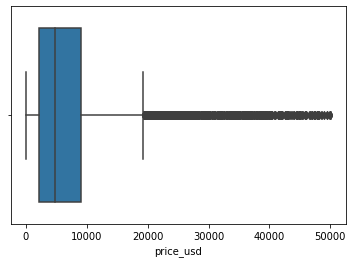

In [ ]:
sns.boxplot(x = 'price_usd', data = NewDF)  # Boxplot nos da una vision rapida al rango intercuartil

<AxesSubplot:xlabel='year_produced'>

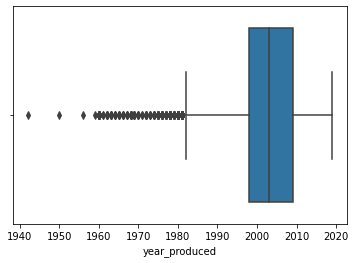

In [ ]:
sns.boxplot(x = 'year_produced', data = NewDF)

Podemos apreciar que tanto el price_usd y el year_produced contienen datos (outliers), que podemos ignorar para mejorar nuestro analisis

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [ ]:
def remove_outlier_IQR(df): #Funcion que nos ayuda a calcular el IQR (Rango intercuartil)
    Q1=df.quantile(0.25)  #EL cuartil 1 que consta del 25x100 
    Q3=df.quantile(0.75)  #EL cuartil 3 que consta del 75x100 
    IQR=Q3-Q1 # obtenemos el Rango intercuartil restando Q3 AL Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))] #Creamos un nuevo dataFrame que contendran los datos que estan por fuera del IQR
    return df_final


Los Items a remover : 1744
Los Items Total en la columna Price : 38531
Los Items despues de Limpiar la columna : 36787


<AxesSubplot:xlabel='price_usd'>

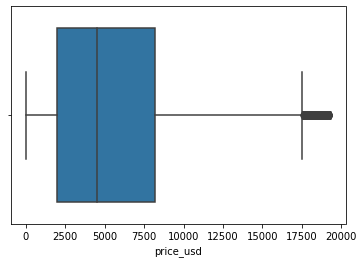

In [ ]:

df_outlier_removed = remove_outlier_IQR(NewDF['price_usd']) # llamamos la funcion de remove outlier
df_outlier_removed = pd.DataFrame(df_outlier_removed) #  
ind_diff = NewDF['price_usd'].index.difference(df_outlier_removed.index) # Buscamos las diferencia entre el DF original y el DF con los outliers

print('Los Items a remover : ' + str(len(ind_diff))) 
print('Los Items Total en la columna Price : ' + str(len(NewDF['price_usd'])))

for i in range(0, len(ind_diff),1):
    df_final = NewDF['price_usd'].drop([ind_diff[i]]) #Eliminamos los datos que son parte del Outliers
    NewDF['price_usd'] = df_final

print('Los Items despues de Limpiar la columna : ' + str(NewDF['price_usd'].count())) 


sns.boxplot(x = 'price_usd', data = NewDF)

Por ahora solo limpiaremos la columna de price_usd para comparar los resultados de datos equilibrados y datos que aun no se han tocado.

<AxesSubplot:>

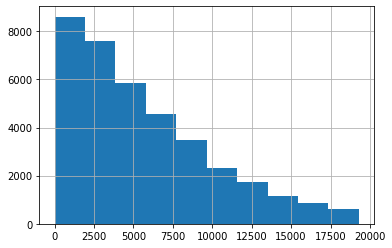

In [ ]:
NewDF['price_usd'].hist() #Histograma de la columna price

Vemos que la distribucion de la columna price no se encuentra normalizada, la mayoria de sus datos se encuentra agrupadas hacia la izquierda, es decir hacia el 0, debemos equilibrar los datos y convertirlos en la llamada campana de gauss  mas informacion : https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal

Ahora para tener una referencia los datos de la columna year produced se encuentran un poco mejor distribuidas, vemos que tiene una distribucion normal, podemos optimizarlo aun mas, pero por ahora lo dejaremos asi y saltaremos al siguiente paso

<AxesSubplot:>

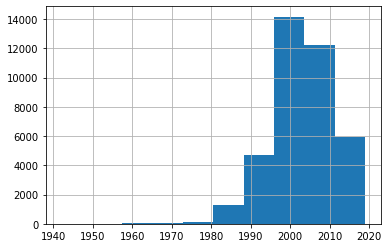

In [ ]:
NewDF['year_produced'].hist() #Histograma de la columna year produced

Ahora que somos consientes la distribucion normal, vemos que la columna price no tiene una distribucion adecuada, tambien podemos asegurar que la escala que maneja los datos es muy grande y confusa, para mejorar la optimizacion de dicha columna, vamos a usar una funcion que nos ayudara a escalar dichos valores. 

La funcion que utilizaremos sera la Tangente Hiperbolica: https://es.wikipedia.org/wiki/Tangente_hiperb%C3%B3lica

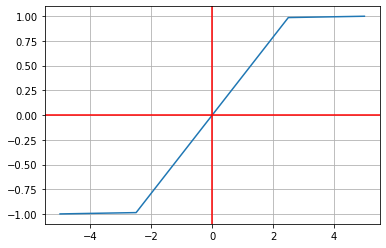

In [ ]:
N = 5  # Numero de puntos
def f(x):   # Definimos la funcion 
  return np.tanh(x) # Tangente Hiperbolica

x = np.linspace(-5, 5, num=N) # definimos el dominio de X

y = f(x) # Imagen 

fig, ax = plt.subplots() # plt para graficar la funcion
ax.plot(x, y)
ax.grid()
ax.axhline(y=0, color='r')
ax.axvline(x=0, color='r')

Como podemos apreciar, la tangente hiperbolica tiene un rango de [-1 , 1] por lo cual reduciremos la distribucion haciendola mas compacta:

<AxesSubplot:>

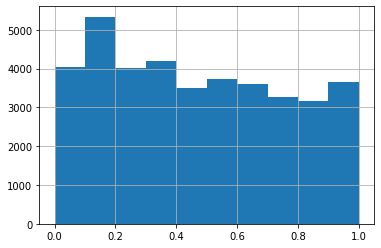

In [ ]:
p = 10000 # p es una variable para escalar los valores a valores mas chicos
NewDF['price_usd'] = df.price_usd.apply(lambda x: np.tanh(x/p)) #aplicamos la tangente hiperbolica a la columna

NewDF['price_usd'].hist() #Histograma de price usd

Ahora contamos con una distribucion normalizada para los datos de price usd, y contamos con datos escalados

Podemos ver que ahora al realizar un jointplot podemos ver que nuestros datos ahora cuentan con una distribucion mas lineal.

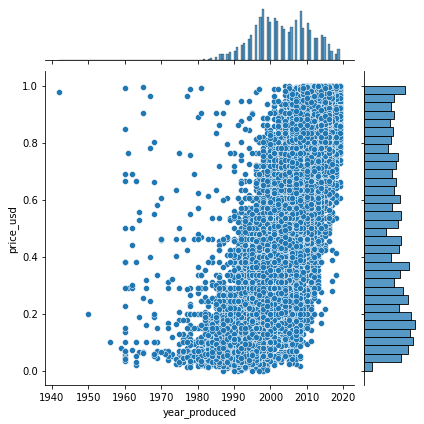

In [ ]:
sns.jointplot(x= NewDF['year_produced'], y=NewDF['price_usd'])

Una vez que procesamos nuestro datos es hora de saltar a realizar la regresion lineal simple 
Recodemos que es una funcion lineal


Tiene la forma de $$f(x)=mx + b$$ donde $m$ y $b$  $\in R$. 

$m$ puede ser calculada por: $$m=\frac{y_{2}-y_{1}}{x_{2}-x_{1}}$$

y $b$ es el punto de corte con el eje $y$. Su dominio es $Dom_{f} = (-\infty, \infty)$. Su imagen es $Im_{f} = (-\infty, \infty)$

Procedemos a realizar las funciones:


In [ ]:
def estimate_b1_b0(x,y): 

    # Obtenemos el promedio de X , Y
    m_x, m_y = np.mean(x), np.mean(y)
    
    # Calculamos las sumatorias 
    sum_xy = np.sum((x-m_x) * (y-m_y))
    sum_xx = np.sum((x-m_x)**2)
    
    # Coeficiente de regresion
    b_1 = sum_xy / sum_xx
    b_0 = m_y - b_1 * m_x
    return (b_0,b_1) 

In [ ]:
def getPredict(x,b): #Funcion de la recta
    return b[0] + b[1] * x

In [ ]:
def plot_regresion(x,y,b): # Funcion para graficar 

    plt.scatter(x,y, color ='c', marker='o',s=30, alpha= 0.3)

    y_pred = getPredict(x,b) # obtenemos la recta
    plt.plot(x,y_pred,color='r')

    plt.xlabel('x-Independiente')
    plt.ylabel('y-Dependiente')
    
    plt.show() # mostrarmos la grafica

Los valores de b0 = -58.33077375945124, y b1 = 0.029357697713157015


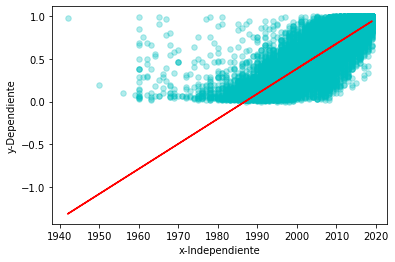

0.8249871325601461
11722.343579457893


In [ ]:
def show(df):
   x = df
   y = NewDF['price_usd']
   b = estimate_b1_b0(x,y)
   print(f'Los valores de b0 = {b[0]}, y b1 = {b[1]}')
   plot_regresion(x,y,b)

show(NewDF['year_produced'])
# Predicciones
x = NewDF['year_produced']
y = NewDF['price_usd']
b = estimate_b1_b0(x,y)


predict = getPredict(2015,b) # el valor para 1960 = 10705.97548243826
print(predict)
normal = np.arctanh(predict)
print(np.absolute(normal * p))



242
38289


<AxesSubplot:xlabel='year_produced'>

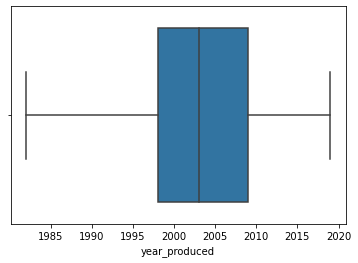

In [ ]:
df_outlier_removed = remove_outlier_IQR(NewDF['year_produced'])
df_outlier_removed = pd.DataFrame(df_outlier_removed)
ind_diff = NewDF['year_produced'].index.difference(df_outlier_removed.index)

print(len(ind_diff))

for i in range(0, len(ind_diff),1):
    df_final = NewDF['year_produced'].drop([ind_diff[i]])
    NewDF['year_produced'] = df_final 

print(NewDF['year_produced'].count()) 
# 38531

sns.boxplot(x = 'year_produced', data = NewDF)

# show(df_2['year_produced'])


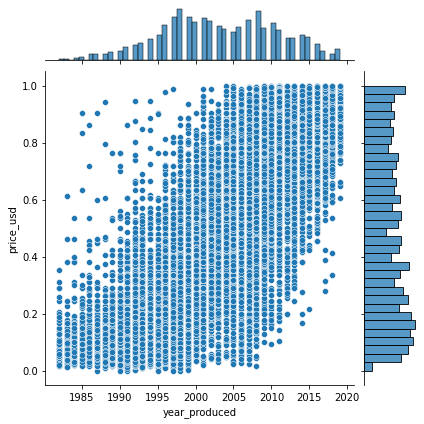

In [ ]:
sns.jointplot(x= NewDF['year_produced'], y=NewDF['price_usd'])

Los valores de b0 = -62.69979190552939, y b1 = 0.03153606041269516


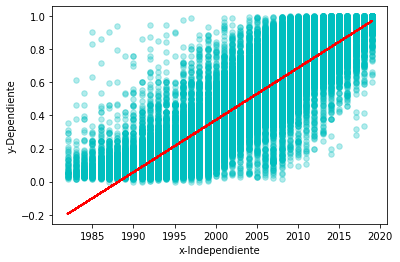

0.8453698260513605
12396.993463453298


In [ ]:
def inputX(X):
   f = np.tanh(X/p)
   return f

show(NewDF['year_produced'])
x = NewDF['year_produced']
y = NewDF['price_usd']
b = estimate_b1_b0(x,y)
# c = inputX(2005)
predict = getPredict(2015,b) # el valor para 1960 = 10705.97548243826
print(predict)
normal = np.arctanh(predict)
print(np.absolute(normal * p))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6546a603-27c4-462c-b3e4-3d77f9bf61da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>